In [3]:
from CrossValidation import *
%matplotlib inline

In [4]:
IMDB_ratings = pd.read_csv('datafiles/movie_books_IMDB_ratings.csv', index_col=0)

In [5]:
GR_ratings = pd.read_csv('datafiles/movie_books_GR_ratings.csv', index_col=0)

In [6]:
dummies = pd.get_dummies(IMDB_ratings.MPAArating)
IMDB_ratings = pd.concat([IMDB_ratings, dummies], axis=1)
IMDB_ratings = IMDB_ratings.rename(columns = {'PG-13':'PG13'})

In [7]:
all_df = IMDB_ratings.merge(GR_ratings, on='Title')

In [8]:
all_df

,Title,MPAArating,Runtime,IMDBRating,IMDBRatingCount,IMDBMCRating,IMDBMCRatingCount,APPROVED,G,GP,M,NOT RATED,PASSED,PG,PG13,R,UNRATED,X,GRRating,GRRatingCount
0,Hababam Sinifi,NaN,87,9.4,23704,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,4.28,717
1,The Godfather,R,175,9.2,1092395,100,14,0,0,0,0,0,0,0,0,1,0,0,4.34,232195
2,The Godfather: Part II,R,202,9.0,742660,80,10,0,0,0,0,0,0,0,0,1,0,0,4.50,4
3,Fight Club,R,139,8.9,1264505,66,35,0,0,0,0,0,0,0,0,1,0,0,4.19,330661
4,The Lord of the Rings: The Return of the King,PG-13,201,8.9,1146982,94,41,0,0,0,0,0,0,0,1,0,0,0,4.16,82
5,Morometii,NaN,142,8.9,2492,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,3.80,5408
6,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,8.8,1171348,92,34,0,0,0,0,0,0,0,1,0,0,0,4.55,75
7,Forrest Gump,PG-13,142,8.8,1166282,82,19,0,0,0,0,0,0,0,1,0,0,0,4.03,40697
8,"Selvi boylum, al yazmalim",NaN,90,8.8,10338,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,4.23,275
9,Goodfellas,R,146,8.7,687251,89,18,0,0,0,0,0,0,0,0,1,0,0,4.36,410


In [9]:
all_df['logGRRating'] = np.log(all_df.GRRating)
all_df['squareIMDBRatingCount'] = np.square(all_df.IMDBRatingCount)

In [10]:
all_df.head()

,Title,MPAArating,Runtime,IMDBRating,IMDBRatingCount,IMDBMCRating,IMDBMCRatingCount,APPROVED,G,GP,...,PASSED,PG,PG13,R,UNRATED,X,GRRating,GRRatingCount,logGRRating,squareIMDBRatingCount
0,Hababam Sinifi,NaN,87,9.4,23704,NaN,NaN,0,0,0,...,0,0,0,0,0,0,4.28,717,1.453953,561879616
1,The Godfather,R,175,9.2,1092395,100,14,0,0,0,...,0,0,0,1,0,0,4.34,232195,1.467874,1193326836025
2,The Godfather: Part II,R,202,9.0,742660,80,10,0,0,0,...,0,0,0,1,0,0,4.50,4,1.504077,551543875600
3,Fight Club,R,139,8.9,1264505,66,35,0,0,0,...,0,0,0,1,0,0,4.19,330661,1.432701,1598972895025
4,The Lord of the Rings: The Return of the King,PG-13,201,8.9,1146982,94,41,0,0,0,...,0,0,1,0,0,0,4.16,82,1.425515,1315567708324


0.0016 0.033339556229 [  0.00000000e+00   0.00000000e+00   4.84993465e-13   0.00000000e+00
   0.00000000e+00] 8.10284876753 0.00103204614129
0.037200000000000004 0.0312060881584 [  2.76297901e-02  -2.57884544e-08   6.05260166e-13   5.46277964e-05
   2.06140688e-02] 8.00872146383 0.206160291039
[  4.05821555e-02  -1.69368874e-07   7.71874964e-13   4.01824659e-05
   2.19878954e-02] 8.00991428309 0.204815497467


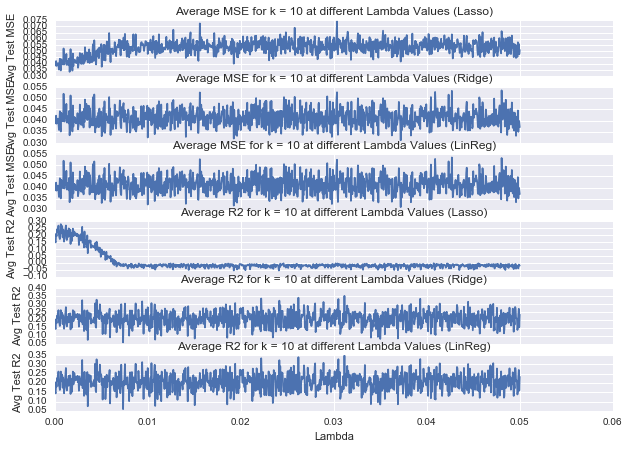

In [11]:
plotMSEandR2vLambda(all_df, 'IMDBRating', ['R', 'IMDBRatingCount', 'squareIMDBRatingCount', 'Runtime', 'GRRating'])